In [37]:
import numpy as np
import requests
from bs4 import BeautifulSoup
import datetime
import pandas as pd
import matplotlib.pyplot as plt
import unicodedata
import os
import yfinance as yf
import math
import warnings
warnings.filterwarnings("ignore")
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from matplotlib.dates import DateFormatter
import statistics
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from nltk.corpus import stopwords
from sklearn.preprocessing import LabelEncoder,label_binarize
from datetime import timedelta
from sklearn.linear_model import LogisticRegression
import time
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, auc
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report,confusion_matrix

In [2]:
def scrape_news(query, start_date, end_date):
    articles = []
    url = f"https://news.google.com/rss/search?q={query}+after:{start_date}+before:{end_date}"
    response = requests.get(url)
    soup = BeautifulSoup(response.content, 'xml')
    items = soup.find_all('item')
    
    for item in items:
        title = item.title.text
        link = item.link.text
        pub_date = item.pubDate.text
        articles.append({'title': title, 'link': link, 'pub_date': pub_date})
    return pd.DataFrame(articles)

In [3]:
start_date = '2021-01-01'
end_date = '2023-12-31'
query = "Google stocks"

# Convert start and end dates to datetime objects
start_date_dt = datetime.datetime.strptime(start_date, '%Y-%m-%d')
end_date_dt = datetime.datetime.strptime(end_date, '%Y-%m-%d')

# Initialize an empty DataFrame to store all articles
all_articles = pd.DataFrame()

# Loop through each month in the date range
current_date = start_date_dt
while current_date < end_date_dt:
    # Define the next month's start date
    next_date = current_date + datetime.timedelta(days=30)
    
    # Format dates to strings
    start_str = current_date.strftime('%Y-%m-%d')
    end_str = next_date.strftime('%Y-%m-%d')
    
    # Scrape news for the current month
    month_articles = scrape_news(query, start_str, end_str)
    
    # Append month articles to the all_articles DataFrame
    all_articles = pd.concat([all_articles, month_articles], ignore_index=True)
    
    # Move to the next month
    current_date = next_date

# Save all articles to a CSV file
all_articles.to_csv('google_news.csv', index=False)



In [4]:
news_df = pd.read_csv('google_news.csv')
news_df.head()

,title,link,pub_date
0,"Google workers form new labour union, a tech i...",https://news.google.com/rss/articles/CBMic2h0d...,"Mon, 04 Jan 2021 08:00:00 GMT"
1,Google removes 30 loan apps from Play store af...,https://news.google.com/rss/articles/CBMilQFod...,"Thu, 14 Jan 2021 08:00:00 GMT"
2,Is your measurement plan future-proof - Think ...,https://news.google.com/rss/articles/CBMibWh0d...,"Tue, 19 Jan 2021 08:00:00 GMT"
3,The man who could have made $1 billion in Goog...,https://news.google.com/rss/articles/CBMiaGh0d...,"Wed, 27 Jan 2021 08:00:00 GMT"
4,Google removes finance-based mobile applicatio...,https://news.google.com/rss/articles/CBMijQFod...,"Thu, 21 Jan 2021 08:00:00 GMT"


In [5]:
# news_df['link'][0]

'https://news.google.com/rss/articles/CBMic2h0dHBzOi8vd3d3Lm1vbmV5Y29udHJvbC5jb20vbmV3cy9idXNpbmVzcy9nb29nbGUtd29ya2Vycy1mb3JtLW5ldy1sYWJvdXItdW5pb24tYS10ZWNoLWluZHVzdHJ5LXJhcml0eS02MzAzNDMxLmh0bWzSAXdodHRwczovL3d3dy5tb25leWNvbnRyb2wuY29tL25ld3MvYnVzaW5lc3MvZ29vZ2xlLXdvcmtlcnMtZm9ybS1uZXctbGFib3VyLXVuaW9uLWEtdGVjaC1pbmR1c3RyeS1yYXJpdHktNjMwMzQzMS5odG1sL2FtcA?oc=5'

In [6]:
# Text preprocessing and cleaning
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import re

nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to C:\Users\Sumit
[nltk_data]     Ranjan\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to C:\Users\Sumit
[nltk_data]     Ranjan\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [7]:
def clean_text(text):
    text = re.sub(r'http\S+', '', text)
    text = re.sub(r'\W', ' ', text)
    text = re.sub(r'\s+', ' ', text)
    text = text.lower()
    tokens = word_tokenize(text)
    tokens = [word for word in tokens if word not in stopwords.words('english')]
    return ' '.join(tokens)

news_df['cleaned_text'] = news_df['title'].apply(clean_text)

In [9]:
# news_df.head()

In [10]:
# Stock prices within Given timeline
import yfinance as yf
google_stock = yf.download('GOOG', start=start_date, end=end_date)
google_stock.reset_index(inplace=True)
google_stock.to_csv('google_stock_prices.csv', index=False)

[*********************100%%**********************]  1 of 1 completed


In [12]:
stock_df = pd.read_csv('google_stock_prices.csv')
# stock_df.head()

In [14]:
!pip install textblob


  Obtaining dependency information for textblob from https://files.pythonhosted.org/packages/02/07/5fd2945356dd839974d3a25de8a142dc37293c21315729a41e775b5f3569/textblob-0.18.0.post0-py3-none-any.whl.metadata
   ---------------------------------------- 0.0/626.3 kB ? eta -:--:--
   - ------------------------------------- 30.7/626.3 kB 640.0 kB/s eta 0:00:01
   ----- ---------------------------------- 92.2/626.3 kB 1.1 MB/s eta 0:00:01
   -------------------- ------------------- 317.4/626.3 kB 2.5 MB/s eta 0:00:01
   ---------------------------------------  624.6/626.3 kB 3.9 MB/s eta 0:00:01
   ---------------------------------------- 626.3/626.3 kB 3.3 MB/s eta 0:00:00


In [15]:
# Sentiment Analysis
from textblob import TextBlob

In [16]:

def get_sentiment(text):
    analysis = TextBlob(text)
    return analysis.sentiment.polarity

news_df['sentiment'] = news_df['cleaned_text'].apply(get_sentiment)

In [ ]:
# Compiling The Entire Dataset

In [17]:
news_df['pub_date'] = pd.to_datetime(news_df['pub_date']).dt.date

stock_df['Date'] = pd.to_datetime(stock_df['Date']).dt.date

merged_df = pd.merge(news_df, stock_df, left_on='pub_date', right_on='Date', how='inner')

if merged_df.empty:
    print("The merged DataFrame is empty. Please check the date ranges and formats.")
else:
    merged_df.to_csv('merged_data.csv', index=False)
    print(merged_df.head())

                                               title  \
0  Google workers form new labour union, a tech i...   
1  Google workers have formed the company's first...   
2  Google removes 30 loan apps from Play store af...   
3  NLP in Finance: Question Answering - Towards D...   
4  Fitbit Closes $2.1 Billion Google Merger - The...   

                                                link    pub_date  \
0  https://news.google.com/rss/articles/CBMic2h0d...  2021-01-04   
1  https://news.google.com/rss/articles/CBMiRGh0d...  2021-01-04   
2  https://news.google.com/rss/articles/CBMilQFod...  2021-01-14   
3  https://news.google.com/rss/articles/CBMiggFod...  2021-01-14   
4  https://news.google.com/rss/articles/CBMiWWh0d...  2021-01-14   

                                        cleaned_text  sentiment        Date  \
0  google workers form new labour union tech indu...   0.136364  2021-01-04   
1  google workers formed company first ever union...   0.250000  2021-01-04   
2  google removes

In [20]:
news_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1601 entries, 0 to 1600
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   title         1601 non-null   object 
 1   link          1601 non-null   object 
 2   pub_date      1601 non-null   object 
 3   cleaned_text  1601 non-null   object 
 4   sentiment     1601 non-null   float64
dtypes: float64(1), object(4)
memory usage: 62.7+ KB


In [22]:
stock_df.sample(10)
stock_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 753 entries, 0 to 752
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       753 non-null    object 
 1   Open       753 non-null    float64
 2   High       753 non-null    float64
 3   Low        753 non-null    float64
 4   Close      753 non-null    float64
 5   Adj Close  753 non-null    float64
 6   Volume     753 non-null    int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 41.3+ KB


In [25]:
merged_df.sample(10)


,title,link,pub_date,cleaned_text,sentiment,Date,Open,High,Low,Close,Adj Close,Volume
740,FANG Stock's Lists Of Problems Keeps Growing -...,https://news.google.com/rss/articles/CBMiRWh0d...,2022-08-16,fang stock lists problems keeps growing invest...,0.00,2022-08-16,122.320000,123.227997,121.535004,122.510002,122.370750,15626200
825,Alphabet just had its worst day since March 20...,https://news.google.com/rss/articles/CBMiXWh0d...,2022-10-26,alphabet worst day since march 2020 covid shut...,-1.00,2022-10-26,96.760002,98.540001,94.570000,94.820000,94.712219,71504300
146,"Korea Web Giant Naver Mulls U.S. Bond, IPO to ...",https://news.google.com/rss/articles/CBMiTGh0d...,2021-04-21,korea web giant naver mulls u bond ipo take go...,0.00,2021-04-21,114.262497,114.765999,112.928497,114.664497,114.534164,23930000
95,Bad news for Android: Study finds Google colle...,https://news.google.com/rss/articles/CBMiTGh0d...,2021-04-01,bad news android study finds google collets 20...,-0.70,2021-04-01,104.897499,107.147003,104.844498,106.887497,106.765999,33980000
136,"What Biden's Tax Plan Means For Amazon, Google...",https://news.google.com/rss/articles/CBMiaGh0d...,2021-04-08,biden tax plan means amazon google facebook ap...,0.00,2021-04-08,113.898003,114.200249,112.884003,113.272003,113.143250,27166000
1348,Trending tickers: Google | AstraZeneca | Hargr...,https://news.google.com/rss/articles/CBMicWh0d...,2023-12-12,trending tickers google astrazeneca hargreaves...,0.00,2023-12-12,133.270004,134.539993,132.830002,133.639999,133.488098,26584000
173,How Google's $150 billion advertising business...,https://news.google.com/rss/articles/CBMiX2h0d...,2021-05-18,google 150 billion advertising business works ...,0.00,2021-05-18,116.845299,117.157501,115.157997,115.171501,115.040588,17302000
144,Google tops the list of most valuable media br...,https://news.google.com/rss/articles/CBMihQFod...,2021-04-21,google tops list valuable media brands us 191 ...,0.00,2021-04-21,114.262497,114.765999,112.928497,114.664497,114.534164,23930000
1064,"Stock Markets Today: First Republic, Microsoft...",https://news.google.com/rss/articles/CBMifGh0d...,2023-04-25,stock markets today first republic microsoft g...,0.25,2023-04-25,106.610001,107.440002,104.559998,104.610001,104.491096,31408100
271,Google discontinues the Pixel 4a 5G and Pixel ...,https://news.google.com/rss/articles/CBMiUWh0d...,2021-08-20,google discontinues pixel 4a 5g pixel 5 androi...,0.00,2021-08-20,137.082993,138.614502,136.466995,138.436996,138.279648,15564000


In [26]:
merged_df.isnull().sum()

title           0
link            0
pub_date        0
cleaned_text    0
sentiment       0
Date            0
Open            0
High            0
Low             0
Close           0
Adj Close       0
Volume          0
dtype: int64

In [27]:
merged_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1402 entries, 0 to 1401
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   title         1402 non-null   object 
 1   link          1402 non-null   object 
 2   pub_date      1402 non-null   object 
 3   cleaned_text  1402 non-null   object 
 4   sentiment     1402 non-null   float64
 5   Date          1402 non-null   object 
 6   Open          1402 non-null   float64
 7   High          1402 non-null   float64
 8   Low           1402 non-null   float64
 9   Close         1402 non-null   float64
 10  Adj Close     1402 non-null   float64
 11  Volume        1402 non-null   int64  
dtypes: float64(6), int64(1), object(5)
memory usage: 131.6+ KB


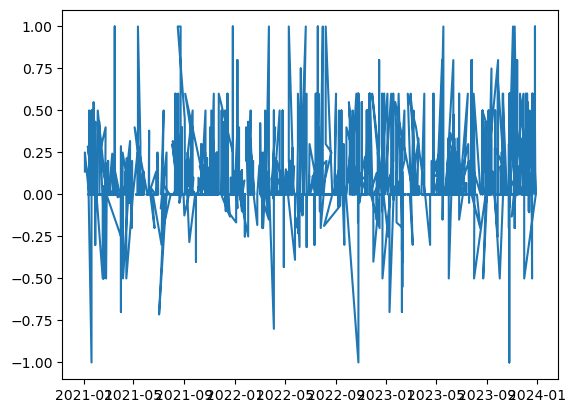

In [28]:
plt.plot(merged_df['Date'],merged_df['sentiment'])

In [ ]:
# Price fluctuation

In [30]:
def calculate_price_movement(row, horizon_days=1):
    pub_date = row['pub_date']
    future_date = pub_date + datetime.timedelta(days=horizon_days)
    
    future_price = stock_df[stock_df['Date'] == future_date]['Close'].values
    if len(future_price) == 0:
        return None
    
    future_price = future_price[0]
    current_price = row['Close']
    
    if future_price > current_price:
        return 'increase'
    elif future_price < current_price:
        return 'decrease'
    else:
        return 'no change'

# Apply the function to the merged DataFrame
merged_df['price_movement'] = merged_df.apply(calculate_price_movement, axis=1)
merged_df.dropna(subset=['price_movement'], inplace=True)

# Save the final labeled data
merged_df.to_csv('labeled_data.csv', index=False)
merged_df.sample(10)

,title,link,pub_date,cleaned_text,sentiment,Date,Open,High,Low,Close,Adj Close,Volume,price_movement
836,3 Reasons to Buy Alphabet Stock After Its Late...,https://news.google.com/rss/articles/CBMiXWh0d...,2022-11-03,3 reasons buy alphabet stock latest price drop...,0.55,2022-11-03,86.345001,86.550003,83.449997,83.489998,83.395096,48510400,increase
80,GameStop's stock price plunges 60 per cent as ...,https://news.google.com/rss/articles/CBMihgFod...,2021-02-03,gamestop stock price plunges 60 per cent reddi...,0.00,2021-02-03,103.650002,105.824997,100.918999,103.503502,103.385857,82364000,decrease
913,Google's Pixel Watch charger is finally back i...,https://news.google.com/rss/articles/CBMiPWh0d...,2022-12-21,google pixel watch charger finally back stock ...,0.00,2022-12-21,89.730003,90.915001,88.910004,90.250000,90.147415,20336400,decrease
746,FANGMAN isn't haunting Indian investors as opt...,https://news.google.com/rss/articles/CBMikAFod...,2022-07-28,fangman haunting indian investors optimism gro...,0.00,2022-07-28,112.800003,114.699997,111.850998,114.589996,114.459747,23303800,increase
1158,Alphabet Stock Climbs After Earnings As Google...,https://news.google.com/rss/articles/CBMiXmh0d...,2023-07-25,alphabet stock climbs earnings google cloud sa...,0.00,2023-07-25,121.879997,123.690002,121.529999,122.790001,122.650429,31820800,increase
301,Geolocated dataset of Chinese overseas develop...,https://news.google.com/rss/articles/CBMiMmh0d...,2021-09-20,geolocated dataset chinese overseas developmen...,0.00,2021-09-20,139.000198,139.362503,137.052994,139.016998,138.858978,34918000,increase
706,Sergey Brin Might Score $100 Million Profit by...,https://news.google.com/rss/articles/CBMid2h0d...,2022-07-25,sergey brin might score 100 million profit sel...,0.00,2022-07-25,108.879997,110.580002,107.010002,108.209999,108.086998,28289900,decrease
525,"Tesla, Apple, Amazon, Google, 4 other US stock...",https://news.google.com/rss/articles/CBMidmh0d...,2022-03-03,tesla apple amazon google 4 us stocks start tr...,0.00,2022-03-03,135.978500,136.713806,133.431000,134.307999,134.155334,19780000,decrease
1394,Google parent Alphabet at 2-month high on AI-l...,https://news.google.com/rss/articles/CBMibmh0d...,2023-12-20,google parent alphabet 2 month high ai led ad ...,0.16,2023-12-20,140.330002,143.078003,139.410004,139.660004,139.501251,33507300,increase
1080,"Bill Ackman, Stanley Druckenmiller, Others Go ...",https://news.google.com/rss/articles/CBMiggFod...,2023-05-18,bill ackman stanley druckenmiller others go ai...,0.00,2023-05-18,121.559998,123.900002,121.489998,123.519997,123.379593,27014500,decrease


In [ ]:
##Extract Features

In [32]:
# 1. Frequencies of words in news


tfidf_vectorizer = TfidfVectorizer(max_features=1000)
tfidf_features = tfidf_vectorizer.fit_transform(merged_df['cleaned_text']).toarray()
tfidf_df = pd.DataFrame(tfidf_features, columns=tfidf_vectorizer.get_feature_names_out())
merged_df = pd.concat([merged_df.reset_index(drop=True), tfidf_df.reset_index(drop=True)], axis=1)
merged_df

,title,link,pub_date,cleaned_text,sentiment,Date,Open,High,Low,Close,...,yields,york,youtube,ytechb,zdnet,zealand,zee,zomato,zoom,zuckerberg
0,"Google workers form new labour union, a tech i...",https://news.google.com/rss/articles/CBMic2h0d...,2021-01-04,google workers form new labour union tech indu...,0.136364,2021-01-04,87.876999,88.032501,85.392502,86.412003,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Google workers have formed the company's first...,https://news.google.com/rss/articles/CBMiRGh0d...,2021-01-04,google workers formed company first ever union...,0.250000,2021-01-04,87.876999,88.032501,85.392502,86.412003,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Google removes 30 loan apps from Play store af...,https://news.google.com/rss/articles/CBMilQFod...,2021-01-14,google removes 30 loan apps play store rbi red...,0.000000,2021-01-14,87.681000,88.750504,86.669998,87.009003,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,NLP in Finance: Question Answering - Towards D...,https://news.google.com/rss/articles/CBMiggFod...,2021-01-14,nlp finance question answering towards data sc...,0.000000,2021-01-14,87.681000,88.750504,86.669998,87.009003,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Fitbit Closes $2.1 Billion Google Merger - The...,https://news.google.com/rss/articles/CBMiWWh0d...,2021-01-14,fitbit closes 2 1 billion google merger thestreet,0.000000,2021-01-14,87.681000,88.750504,86.669998,87.009003,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1159,Dow Jones Rises On Key Economic Data; Google L...,https://news.google.com/rss/articles/CBMimQFod...,2023-12-26,dow jones rises key economic data google leads...,0.066667,2023-12-26,142.979996,143.945007,142.500000,142.820007,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1160,Magnificent 7 Tech Stocks Will Outperform the ...,https://news.google.com/rss/articles/CBMieGh0d...,2023-12-26,magnificent 7 tech stocks outperform p 493 202...,1.000000,2023-12-26,142.979996,143.945007,142.500000,142.820007,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1161,ChatGPT vs. Google Bard: Which had better stoc...,https://news.google.com/rss/articles/CBMiVmh0d...,2023-12-26,chatgpt vs google bard better stock prediction...,0.416667,2023-12-26,142.979996,143.945007,142.500000,142.820007,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1162,AI Predictions: 3 Penny Stocks That Google Gem...,https://news.google.com/rss/articles/CBMiS2h0d...,2023-12-27,ai predictions 3 penny stocks google gemini sa...,0.000000,2023-12-27,142.830002,143.320007,141.050995,141.440002,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [33]:
#2. Topic Modelling

lda_model = LatentDirichletAllocation(n_components=10, random_state=42)
lda_features = lda_model.fit_transform(tfidf_features)
#addition in the data frame
for i in range(lda_features.shape[1]):
    merged_df[f'topic_{i}'] = lda_features[:, i]
    
merged_df.to_csv('labeled_data_with_features.csv', index=False)
merged_df.head()

,title,link,pub_date,cleaned_text,sentiment,Date,Open,High,Low,Close,...,topic_0,topic_1,topic_2,topic_3,topic_4,topic_5,topic_6,topic_7,topic_8,topic_9
0,"Google workers form new labour union, a tech i...",https://news.google.com/rss/articles/CBMic2h0d...,2021-01-04,google workers form new labour union tech indu...,0.136364,2021-01-04,87.876999,88.032501,85.392502,86.412003,...,0.028887,0.028886,0.028886,0.028888,0.028886,0.028892,0.028889,0.740013,0.028886,0.028887
1,Google workers have formed the company's first...,https://news.google.com/rss/articles/CBMiRGh0d...,2021-01-04,google workers formed company first ever union...,0.250000,2021-01-04,87.876999,88.032501,85.392502,86.412003,...,0.028530,0.028519,0.028517,0.028520,0.028515,0.743312,0.028517,0.028528,0.028522,0.028520
2,Google removes 30 loan apps from Play store af...,https://news.google.com/rss/articles/CBMilQFod...,2021-01-14,google removes 30 loan apps play store rbi red...,0.000000,2021-01-14,87.681000,88.750504,86.669998,87.009003,...,0.480423,0.023776,0.023771,0.023771,0.023774,0.023773,0.023773,0.023771,0.023772,0.329398
3,NLP in Finance: Question Answering - Towards D...,https://news.google.com/rss/articles/CBMiggFod...,2021-01-14,nlp finance question answering towards data sc...,0.000000,2021-01-14,87.681000,88.750504,86.669998,87.009003,...,0.031688,0.031685,0.031684,0.714829,0.031685,0.031685,0.031687,0.031687,0.031685,0.031686
4,Fitbit Closes $2.1 Billion Google Merger - The...,https://news.google.com/rss/articles/CBMiWWh0d...,2021-01-14,fitbit closes 2 1 billion google merger thestreet,0.000000,2021-01-14,87.681000,88.750504,86.669998,87.009003,...,0.035178,0.035179,0.035182,0.035178,0.035179,0.035179,0.035180,0.035191,0.683369,0.035184


In [ ]:
#Label Encoding on price fluctuation feature


In [35]:
# Load the labeled dataset with features
data = pd.read_csv('labeled_data_with_features.csv')

# Label encode the target variable
label_encoder = LabelEncoder()
data['encoded_movement'] = label_encoder.fit_transform(data['price_movement'])
data[['encoded_movement','price_movement']]

,encoded_movement,price_movement
0,1,increase
1,1,increase
2,0,decrease
3,0,decrease
4,0,decrease
...,...,...
1159,0,decrease
1160,0,decrease
1161,0,decrease
1162,0,decrease


In [36]:
#Training to Predict Price Movements


# Select relevant features and target
X = data[['sentiment'] + list(data.columns[-1:-11])]  # Sentiment and TF-IDF f eatures
y = data['encoded_movement']  # Encoded target variable

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
y_test = label_encoder.inverse_transform(y_test)

# Convert categorical labels to binary labels using numpy
y_test_binary = np.where(y_test == 'increase', 1, 0)

Training on various ML algorithms

1. Logistic Regression
2. Support Vector Machine
3. Random Forest


In [38]:
## 1. LR

logreg = LogisticRegression(max_iter=1000, random_state=42)
logreg.fit(X_train, y_train)
y_pred_logreg = logreg.predict(X_test)
y_pred_logreg = label_encoder.inverse_transform(y_pred_logreg)
y_pred_logreg = np.where(y_pred_logreg == 'increase', 1, 0)

# Evaluate models
print("Logistic Regression:")
print(classification_report(y_test_binary, y_pred_logreg))
print("Accuracy:", accuracy_score(y_test_binary, y_pred_logreg))

Logistic Regression:
              precision    recall  f1-score   support

           0       0.51      0.84      0.64       118
           1       0.53      0.18      0.27       115

    accuracy                           0.52       233
   macro avg       0.52      0.51      0.45       233
weighted avg       0.52      0.52      0.46       233

Accuracy: 0.5150214592274678


In [39]:
## 2. SVM

from sklearn.svm import SVC
svm = SVC(kernel='linear', probability=True, random_state=42)
svm.fit(X_train, y_train)
y_pred_svm = svm.predict(X_test)
y_pred_svm = label_encoder.inverse_transform(y_pred_svm)
y_pred_svm = np.where(y_pred_svm == 'increase', 1, 0)

print("\nSupport Vector Machine (SVM):")
print(classification_report(y_test_binary, y_pred_svm))
print("Accuracy:", accuracy_score(y_test_binary, y_pred_svm))


Support Vector Machine (SVM):
              precision    recall  f1-score   support

           0       0.51      1.00      0.67       118
           1       0.00      0.00      0.00       115

    accuracy                           0.51       233
   macro avg       0.25      0.50      0.34       233
weighted avg       0.26      0.51      0.34       233

Accuracy: 0.5064377682403434


In [40]:
## Random Forest

from sklearn.ensemble import RandomForestClassifier
# Train Random Forest model
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
y_pred_rf = label_encoder.inverse_transform(y_pred_rf)
y_pred_rf = np.where(y_pred_rf == 'increase', 1, 0)

print("\nRandom Forest:")
print(classification_report(y_test_binary, y_pred_rf))
print("Accuracy:", accuracy_score(y_test_binary, y_pred_rf))


Random Forest:
              precision    recall  f1-score   support

           0       0.53      0.81      0.64       118
           1       0.57      0.27      0.37       115

    accuracy                           0.54       233
   macro avg       0.55      0.54      0.50       233
weighted avg       0.55      0.54      0.51       233

Accuracy: 0.5407725321888412


Model Evaluation

In [41]:
def evaluate_model(y_true, y_pred, model_name):
    print(f"Model: {model_name}")
    print(classification_report(y_true, y_pred))
    print("Accuracy:", accuracy_score(y_true, y_pred))
    print("Confusion Matrix:")
    print(confusion_matrix(y_true, y_pred))
    print()
    

In [42]:
# Evaluating LR

evaluate_model(y_test_binary, y_pred_logreg, "Logistic Regression")

Model: Logistic Regression
              precision    recall  f1-score   support

           0       0.51      0.84      0.64       118
           1       0.53      0.18      0.27       115

    accuracy                           0.52       233
   macro avg       0.52      0.51      0.45       233
weighted avg       0.52      0.52      0.46       233

Accuracy: 0.5150214592274678
Confusion Matrix:
[[99 19]
 [94 21]]



In [43]:
# Evaluating SVM

evaluate_model(y_test_binary, y_pred_svm, "Support Vector Machine (SVM)")

Model: Support Vector Machine (SVM)
              precision    recall  f1-score   support

           0       0.51      1.00      0.67       118
           1       0.00      0.00      0.00       115

    accuracy                           0.51       233
   macro avg       0.25      0.50      0.34       233
weighted avg       0.26      0.51      0.34       233

Accuracy: 0.5064377682403434
Confusion Matrix:
[[118   0]
 [115   0]]



In [44]:
# Evaluating Random Forest

evaluate_model(y_test_binary, y_pred_rf, "Random Forest")

Model: Random Forest
              precision    recall  f1-score   support

           0       0.53      0.81      0.64       118
           1       0.57      0.27      0.37       115

    accuracy                           0.54       233
   macro avg       0.55      0.54      0.50       233
weighted avg       0.55      0.54      0.51       233

Accuracy: 0.5407725321888412
Confusion Matrix:
[[95 23]
 [84 31]]



ROC AUC Curve

In [46]:
# ROC-AUC Curve (assuming binary classification)
def plot_roc_curve(y_true, y_pred_proba, model_name):
    fpr, tpr, thresholds = roc_curve(y_true, y_pred_proba[:, 1])
    roc_auc = auc(fpr, tpr)

    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve - {model_name}')
    plt.legend(loc="lower right")
    plt.show()

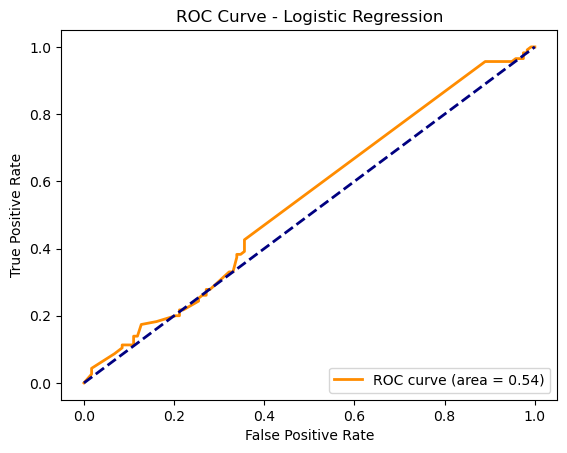

In [47]:
## 1. LR

# Get probabilities for Logistic Regression (required for ROC curve)
y_pred_proba_logreg = logreg.predict_proba(X_test)
# Plot ROC curve for Logistic Regression
plot_roc_curve(y_test_binary, y_pred_proba_logreg, "Logistic Regression")

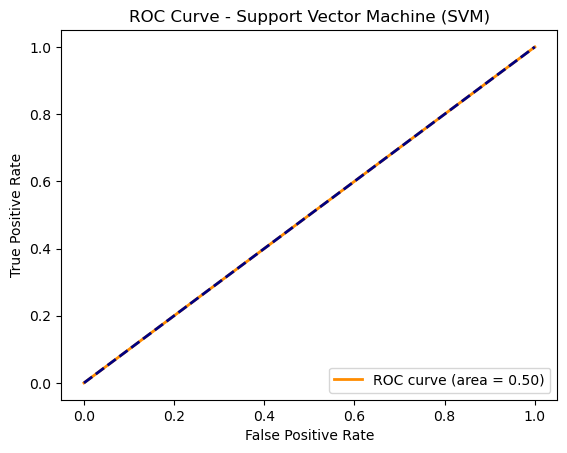

In [48]:
##2. SVM

# Get probabilities for SVM (required for ROC curve)
y_pred_proba_svm = svm.predict_proba(X_test)

# Plot ROC curve for SVM
plot_roc_curve(y_test_binary, y_pred_proba_svm, "Support Vector Machine (SVM)")

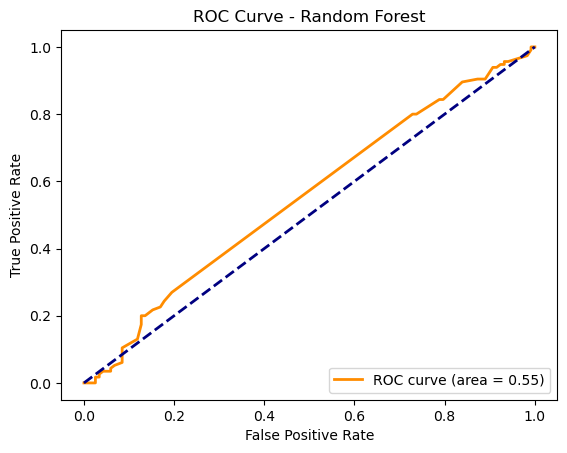

In [49]:
##3. Random forest

# Get probabilities for Random Forest (required for ROC curve)
y_pred_proba_rf = rf.predict_proba(X_test)
# Plot ROC curve for Random Forest
plot_roc_curve(y_test_binary, y_pred_proba_rf, "Random Forest")

Price fluctuation using Neural Networks


In [51]:


# Select relevant features and target
X_text = data['cleaned_text']  # Cleaned text features
X_numeric = data.drop(['price_movement', 'cleaned_text'], axis=1)  # Numeric features
y = data['encoded_movement']  # Encoded target variable

# Split data into train and test sets
X_text_train, X_text_test, X_numeric_train, X_numeric_test, y_train, y_test = train_test_split(
    X_text, X_numeric, y, test_size=0.2, random_state=42
)

# Initialize TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=1000)  # You can adjust max_features as needed
X_train_tfidf = tfidf_vectorizer.fit_transform(X_text_train).toarray()
X_test_tfidf = tfidf_vectorizer.transform(X_text_test).toarray()

In [52]:

import tensorflow as tf
from tensorflow.keras.layers import Input, Dense, Concatenate, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Sequential

# Define neural network architecture
model = Sequential([
    Dense(128, activation='relu', input_dim=X_train_tfidf.shape[1]),
    Dropout(0.5),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [53]:
# Train the model

model.fit(X_train_tfidf, y_train, epochs=10, batch_size=32, validation_data=(X_test_tfidf, y_test))

# Evaluate the model
y_pred = model.predict(X_test_tfidf)
y_pred_binary = (y_pred > 0.5).astype(int)  # Convert probabilities to binary predictions

print("Classification Report:")
print(classification_report(y_test, y_pred_binary))

print("Accuracy:", accuracy_score(y_test, y_pred_binary))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_binary))

Epoch 1/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.4675 - loss: 0.6941 - val_accuracy: 0.5107 - val_loss: 0.6928
Epoch 2/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6706 - loss: 0.6843 - val_accuracy: 0.4893 - val_loss: 0.6930
Epoch 3/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7216 - loss: 0.6673 - val_accuracy: 0.5150 - val_loss: 0.6945
Epoch 4/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8099 - loss: 0.6160 - val_accuracy: 0.5236 - val_loss: 0.7102
Epoch 5/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8401 - loss: 0.5223 - val_accuracy: 0.4764 - val_loss: 0.7776
Epoch 6/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8550 - loss: 0.4114 - val_accuracy: 0.4807 - val_loss: 0.8902
Epoch 7/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9180 - loss: 0.2781 - val_accuracy: 0.5021 - val_loss: 1.0230
Epoch 8/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9525 - loss: 0.1876 - val_accuracy: 0.5021 - val_loss


Neural Network Model Accuracy and Loss Curves

Epoch 1/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9860 - loss: 0.0705 - val_accuracy: 0.5150 - val_loss: 1.5333
Epoch 2/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9780 - loss: 0.0851 - val_accuracy: 0.5021 - val_loss: 1.6149
Epoch 3/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9809 - loss: 0.0553 - val_accuracy: 0.5107 - val_loss: 1.7240
Epoch 4/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9934 - loss: 0.0382 - val_accuracy: 0.4979 - val_loss: 1.8161
Epoch 5/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9927 - loss: 0.0310 - val_accuracy: 0.4979 - val_loss: 1.9046
Epoch 6/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9913 - loss: 0.0324 - val_accuracy: 0.5021 - val_loss: 1.9781
Epoch 7/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9949 - loss: 0.0260 - val_accuracy: 0.5150 - val_loss: 2.0258
Epoch 8/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9986 - loss: 0.0192 - val_accuracy: 0.5021 - val_loss:

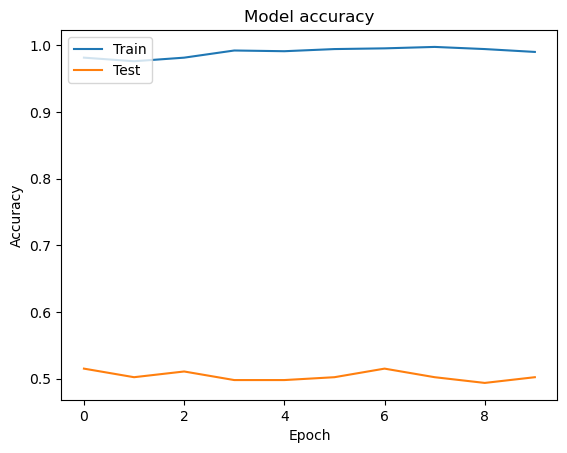

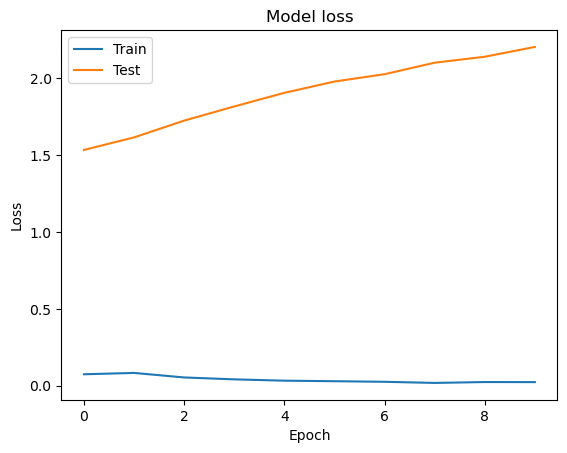

In [54]:
# Train the model and capture the history
history = model.fit(X_train_tfidf, y_train, epochs=10, batch_size=32, validation_data=(X_test_tfidf, y_test))

# Plot training history
def plot_history(history):
    # Plot training & validation accuracy values
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Model accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend(['Train', 'Test'], loc='upper left')
    plt.show()

    # Plot training & validation loss values
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend(['Train', 'Test'], loc='upper left')
    plt.show()

# Plot the training history
plot_history(history)


Finding Buying and Selling Points of GOOGLE Stocks and total return

In [55]:
def aggregate_sentiment_scores(headlines_df):
    sentiment_summary = headlines_df.groupby('Date')['sentiment'].mean()
    return sentiment_summary

def generate_trading_signals(sentiment_summary):
    signals = sentiment_summary.apply(lambda x: 1 if x > 0.2 else (-1 if x < -0.2 else 0))
    return signals

In [61]:
def calculate_portfolio_metrics(portfolio):
    total_trades = len(portfolio) // 2
    wins = portfolio[portfolio['type'] == 'sell']['profit'] > 0
    win_percentage = wins.mean() * 100
    total_profit = portfolio[portfolio['type'] == 'sell']['profit'].sum()
    
    return total_trades, win_percentage, total_profit

def calculate_sharpe_ratio(portfolio, risk_free_rate=0.01):
    daily_returns = portfolio[portfolio['type'] == 'sell']['profit']
    excess_returns = daily_returns - risk_free_rate
    sharpe_ratio = excess_returns.mean() / excess_returns.std()
    return sharpe_ratio

def calculate_max_drawdown(portfolio):
    portfolio['cumulative_profit'] = portfolio['profit'].cumsum()
    cumulative_max = portfolio['cumulative_profit'].cummax()
    drawdown = portfolio['cumulative_profit'] - cumulative_max
    max_drawdown = drawdown.min()
    return max_drawdown

In [62]:
import plotly.graph_objects as go

def plot_signals(stock_data, portfolio):
    start_date = portfolio['date'].min()
    end_date = portfolio['date'].max()

    # Filter stock data
    stock_data = stock_data[(stock_data['Date'] >= start_date) & (stock_data['Date'] <= end_date)]
    
    buy_signals = portfolio[portfolio['type'] == 'buy']
    sell_signals = portfolio[portfolio['type'] == 'sell']
    fig = go.Figure()
    # Add stock price trace
    fig.add_trace(go.Scatter(
        x=stock_data['Date'], 
        y=stock_data['Close'],
        mode='lines',
        name='Stock Price',
        line=dict(color='blue')
    ))

    # Add buy signals
    fig.add_trace(go.Scatter(
        x=buy_signals['date'], 
        y=buy_signals['price'],
        mode='markers',
        name='Buy Signal',
        marker=dict(symbol='triangle-up', color='green', size=10)
    ))

    # Add sell signals
    fig.add_trace(go.Scatter(
        x=sell_signals['date'], 
        y=sell_signals['price'],
        mode='markers',
        name='Sell Signal',
        marker=dict(symbol='triangle-down', color='red', size=10)
    ))
    # Update layout for better presentation
    fig.update_layout(
        title=f'Stock Price with Buy and Sell Signals for Alphabet',
        xaxis_title='Date',
        yaxis_title='Price',
        legend_title='Legend',
        hovermode='x'
    )
    fig.show()

In [63]:
def simulate_trades(stock_data, trading_signals,capital):
    data = pd.read_csv('merged_data.csv')
    date = data['Date']
    portfolio = []
    position = 0
    buy_price = 0
    quantity =0
    for index, price in (stock_data['Close'].items()):
        if date[index] in trading_signals.index:
            signal = trading_signals.loc[date[index]]
            if signal == 1 and position == 0:  # Buy signal
                position = 1
                buy_price = price
                quantity = capital/price
                capital = capital%price
                portfolio.append({'date': date[index], 'type': "buy", 'price': buy_price, 'capital':capital})
            elif signal == -1 and position == 1 and (price>buy_price) :  # Sell signal
                position = 0
                sell_price = price
                profit = (sell_price - buy_price)*quantity
                capital = capital+ quantity*sell_price
                portfolio.append({'date': date[index], 'type': "sell", 'price': sell_price,'capital':capital, 'profit': profit})

    return pd.DataFrame(portfolio)

In [64]:
def ultimate_res(rate, intial):

    # Fetch news data
    news_data = pd.read_csv('merged_data.csv')
    # Calculate sentiment scores
    news_data_with_scores = news_data[['Date','sentiment']]
    # Aggregate sentiment scores by date
    sentiment_summary = aggregate_sentiment_scores(news_data_with_scores)
    # Generate trading signals
    trading_signals = generate_trading_signals(sentiment_summary)
    # Simulate trades
    print("\nSimulating trades...")
    portfolio = simulate_trades(news_data, trading_signals, intial)
    # Calculate portfolio metrics
    total_trades, win_percentage, total_profit = calculate_portfolio_metrics(portfolio)
    # Print the portfolio
    print(portfolio)
    print(f"\nInitial capital: ${intial}")
    print(f"Total Trades: {total_trades}")
    print(f"Win Percentage: {win_percentage:.2f}%")
    print(f"Total Portfolio Returns: ${total_profit:.2f}")
    print(f"Sharpe ratio:{calculate_sharpe_ratio(portfolio, rate):.2f} with risk free rate of {rate}")
    print(f"Max drawdown: {calculate_max_drawdown(portfolio)}")
    # Plot buy and sell signals
    plot_signals(news_data, portfolio)

In [65]:
ultimate_res(0.03, 10000)


Simulating trades...
          date  type       price       capital       profit
0   2021-01-11   buy   88.335999     18.032166          NaN
1   2021-02-16  sell  106.095001  12028.424642  2010.392476
2   2021-02-09   buy  104.175499     48.242261          NaN
3   2021-02-24  sell  104.758499  12143.981904    67.315001
4   2021-02-04   buy  103.118500     79.117432          NaN
5   2021-04-06  sell  111.237503  13179.252009   956.152672
6   2021-04-23   buy  115.764999     97.807077          NaN
7   2021-07-08  sell  129.177002  14803.946856  1526.887770
8   2021-07-13   buy  130.994507      1.567583          NaN
9   2021-09-13  sell  143.464996  16214.828984  1409.314545
10  2021-09-17   buy  141.463501     87.989873          NaN

Initial capital: $10000
Total Trades: 5
Win Percentage: 100.00%
Total Portfolio Returns: $5970.06
Sharpe ratio:1.63 with risk free rate of 0.03
Max drawdown: 0.0
